In [3]:
# 线性回归不止 一个解
#X = ([2,3,4,5,6],[7,8,9,10,11])
#y = ([15],
#     [20])
#特征量大于数据量 线性回归的不止一个

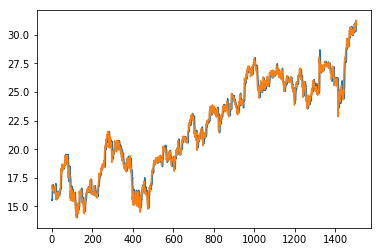

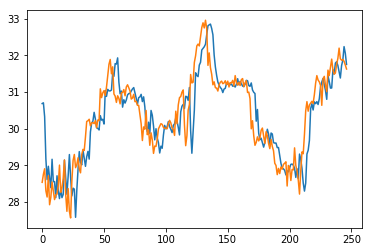

(1505, 5)
(1505,)
            date       open  close    low       high       volume
434   2010-01-04  15.220000  15.45  15.15  15.640000   67079900.0
902   2010-01-05  15.460000  15.53  15.45  15.670000   64550600.0
1370  2010-01-06  15.530000  15.45  15.44  15.620000   55464900.0
1838  2010-01-07  15.480000  16.25  15.43  16.480000  185472300.0
2306  2010-01-08  16.309999  16.60  16.27  16.690001  115112600.0


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

path = r'./prices.csv'

df = pd.read_csv(path)
df = df[df['symbol'] == 'GE']

#20151231 DATA
df1 = df[df['date']<'2016']
train_df1 = df1[['date','open','close','low','high','volume']]

#2016 DATA
df2 = df[df['date']>='2016']


#X_train m*n 前5日数据 
X_train = train_df1[['open','close','low','high','volume']].iloc[:-5,:]

#5日后开盘价格
y_train = train_df1['open'].iloc[5:]

lr.fit(X_train,y_train)

#使用模型验证2016年前数据
y_pred = lr.predict(X_train)

L = len(y_pred)


plt.plot(np.arange(L),y_pred)
plt.plot(np.arange(L),y_train)

plt.show()
#使用2016年后 test数据数据验证

X_test = df2[['open','close','low','high','volume']].iloc[:-5,:]
y_test = df2['open'].iloc[5:]

y_pred2 = lr.predict(X_test)

L = len(y_pred2)

plt.plot(np.arange(L),y_pred2)
plt.plot(np.arange(L),y_test)

plt.show()

print(X_train.shape)
print(y_train.shape)
print(train_df1.head())

预测那天： 30.940001000000002
实际结果:
 720593    30.940001
721092    30.389999
721591    30.420000
722090    30.490000
722589    30.520000
Name: open, dtype: float64
预测结果： [30.49363486]
1752


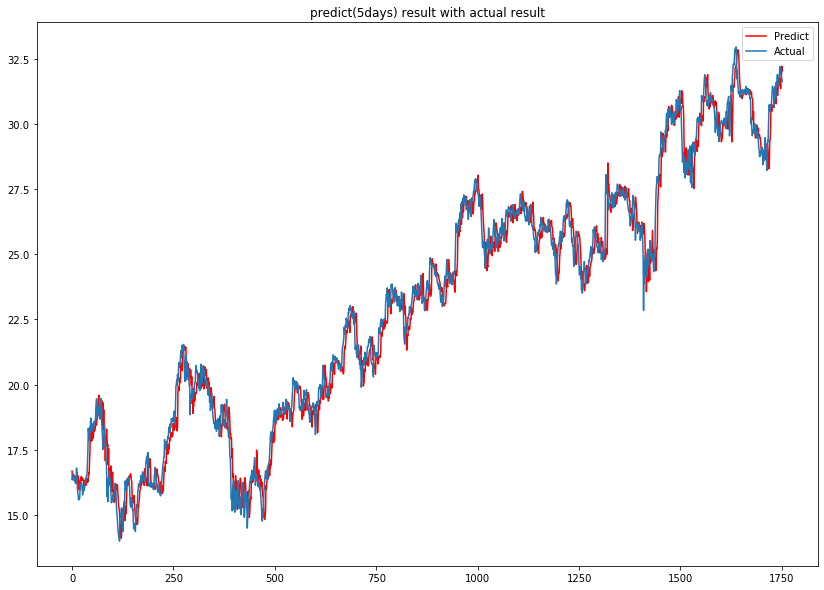

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

path = r'./prices.csv'

df = pd.read_csv(path)
df = df[df['symbol'] == 'GE']

#20151231 DATA
df1 = df[df['date']<'2016']
train_df1 = df1[['date','open','close','low','high','volume']]

#2016 DATA
df2 = df[df['date']>='2016']


#X_train m*n 前5日数据 
X_train = train_df1[['open','close','low','high','volume']].iloc[:-5,:]

#5日后开盘价格
y_train = train_df1['open'].iloc[5:]

lr.fit(X_train,y_train)

#使用模型验证2016年前数据
y_pred = lr.predict(X_train)

L = len(y_pred)


#plt.plot(np.arange(L),y_pred)
#plt.plot(np.arange(L),y_train)
#plt.title('Before 2016')

#plt.show()
#使用2016年后 test数据数据验证

X_test = df2[['open','close','low','high','volume']].iloc[:-5,:]
y_test = df2['open'].iloc[5:]

y_pred2 = lr.predict(X_test)

#L = len(y_pred2)
#plt.figure(figsize=(14,14))
#plt.plot(np.arange(L),y_pred2,color='red')
##plt.plot(np.arange(L),y_test)
#plt.title('2016')
#plt.show()

#ndays data
ndaysdata = df[['date','open','close','low','high','volume']]
ndaysdata = ndaysdata.sort_values(by='date')
ndaysdata = ndaysdata.drop(['date'],axis=1)
_totalnum = ndaysdata.shape[0]



_num = 1500
# y train 5天后到最后一天数据
y_ndaysdata_train = ndaysdata['open'].iloc[5:(_num)]

# 5 天后 实际last day open actual
y_decide =  ndaysdata['open'].iloc[(_num)]
y_actual = ndaysdata['open'].iloc[_num:(_num+5)]

# 存有N天的数据,N+5天的y数据 最后前5天数据
X_ndaysdata_train = ndaysdata.iloc[:_num-5,:]

#需要第N天的数据，测试数据
X_actual = X_ndaysdata_train.iloc[-1:,:]

#
lr.fit(X_ndaysdata_train,y_ndaysdata_train)
y_pred = lr.predict(X_actual)

print('预测那天：',y_decide)
print('实际结果:\n',y_actual)
print('预测结果：',y_pred)

#预测数据组
predictlist = []
for i in range(10, _totalnum):
    y_ndaysdata_train = ndaysdata['open'].iloc[5:i]
    X_ndaysdata_train = ndaysdata.iloc[:i-5,:]
    X_actual = X_ndaysdata_train.iloc[-1:,:]
    lr.fit(X_ndaysdata_train,y_ndaysdata_train)
    #第11天的预测数据
    y_pred = lr.predict(X_actual)
    predictlist.append(y_pred)

print(len(predictlist))

#从第11天开始预测的
predictarry = np.array(predictlist)
#取第11天实际数据
actualdata = ndaysdata['open'].iloc[10:]

L = len(actualdata)
plt.figure(figsize=(14,10))
plt.title('predict(5days) result with actual result')
plt.plot(np.arange(L),predictarry,color='red')
plt.plot(np.arange(L),actualdata)
plt.legend(['Predict','Actual'])
#plt.title('2016')
#plt.show()
plt.show()

#print(predictarry.shape)
#print(actualdata.shape)

#print(y_ndaysdata_train.shape)
#print(X_ndaysdata_train.shape)
#print(X_train.shape)
#print(y_train.shape)
#print(train_df1.head())